In [4]:
import numpy as np
from libow8 import sensor_net
import matplotlib.pyplot as plt
from panel_ow import Panel


In [21]:
dx = Panel(A=10, rs=1, rsh=1000, n=1.6, voc=0.64, isc=35e-3, G=1, Gac = 1e-7)

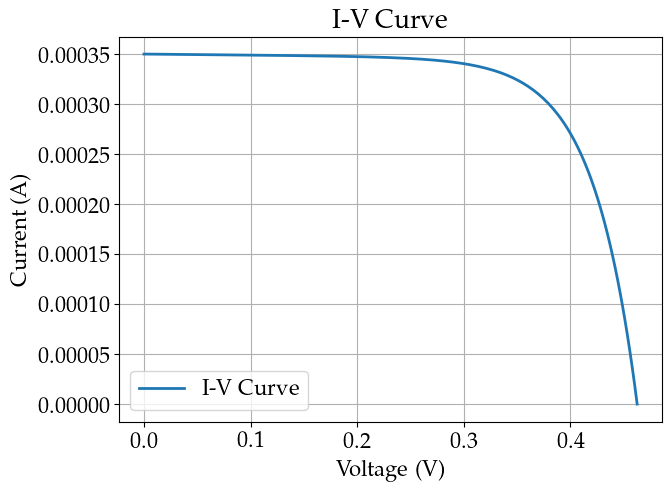

In [22]:
dx.run()

In [23]:
dx.calc_capacitance()

In [24]:
dx.set_circuit(Rc = 10, Lo = 5, Co = 220e-6)

In [25]:
dx.find_bw()

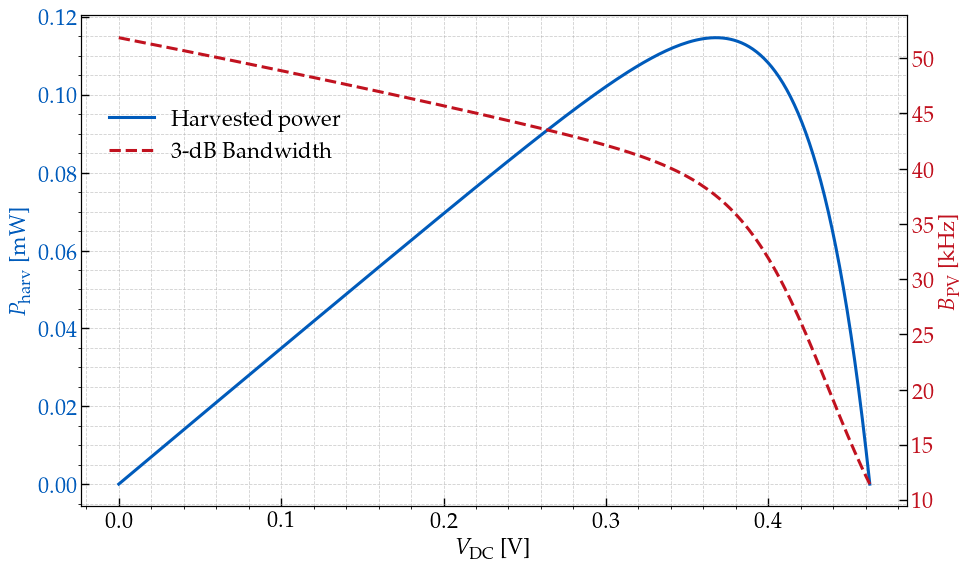

In [26]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size" : 16,
    "lines.linewidth" : 2,
})

# --- Create figure and twin axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# --- Left axis: Power ---
ax1.plot(dx.V, dx.P*1000, color='#005BBB', linewidth=2.2, label=r'Harvested power')  # deep blue
ax1.set_xlabel(r'$V_\mathrm{DC}$ [V]', fontsize=16)
ax1.set_ylabel(r'$P_\mathrm{harv}$  [mW]', fontsize=16, color='#005BBB')
ax1.tick_params(axis='y', labelcolor='#005BBB')

# --- Right axis: Bandwidth ---
ax2.plot(dx.V, dx.BW/1000, color='#C1121F', linewidth=2.2, linestyle='--', label=r'3-dB Bandwidth')  # crimson red
ax2.set_ylabel(r'$B_\mathrm{PV}$ [kHz]', fontsize=16, color='#C1121F')
ax2.tick_params(axis='y', labelcolor='#C1121F')

# --- Grid and layout ---
ax1.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.6)
ax1.minorticks_on()
ax1.tick_params(direction='in', length=6, width=1)
ax2.tick_params(direction='in', length=6, width=1)
fig.tight_layout()

# --- Combined legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper right',           # initial location reference
    bbox_to_anchor=(0.34, 0.85),   # (x, y) in axes fraction; lower y moves it down
    frameon=False,
    ncol=1                        # optional: place items in two columns
)
plt.savefig("bw.power.pdf", dpi=300, bbox_inches='tight')
plt.show()
